# Mall Customer Segmentation Project

## Overview
This machine learning project focuses on customer segmentation for a supermarket chain, utilizing a toy dataset that simulates customer spending patterns in a mall environment. The primary objective is to identify and target the most suitable customer segments for new product launches and marketing initiatives.

## Methodology
The project employs K-Means Clustering, a non-hierarchical clustering algorithm, to segment customers based on their spending behaviors and other relevant attributes.

## Project Objectives
1. Analyze customer spending patterns and behaviors
2. Segment customers into distinct groups based on their characteristics
3. Identify the most promising customer segments for targeted marketing
4. Develop strategies for new product introductions tailored to specific customer segments

## Data Description
The dataset comprises simulated customer data, including but not limited to:
- Demographic information
- Spending habits
- Frequency of visits
- Purchase history

## Expected Outcomes
1. A clear segmentation of customers into distinct groups
2. Identification of high-value customer segments
3. Actionable insights for marketing and product development teams
4. A data-driven strategy for new product launches and promotions

## Business Impact
By leveraging this customer segmentation analysis, the supermarket aims to:
- Increase the efficiency of marketing campaigns
- Improve customer engagement and satisfaction
- Optimize inventory management for new product launches
- Enhance overall revenue and profitability

## Next Steps
Upon completion of the initial analysis, the findings will be presented to stakeholders for review and implementation of targeted marketing strategies.

In [1]:
# importing necessary libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### No missing data, well that's how a toy dataset works! :D

In [6]:
customers = df.iloc[:, [3,4]].values
customers[:2]

array([[15, 39],
       [15, 81]])

#### I am assigning 3rd and 4th columns, viz., Annual spending and Spending scores to customers variable by converting them Numpy Arrays. And checking the first two rows of customers array.

In [7]:
# We need to find the right n_cluster for the algo, hence we are using the best method known - Elbow Method.
# We assume the max number can be between 1 to 10 though it might differ from case to case.
# Running the code from 1 to 10 to see the optimum value, of course, by plotting in the next step.
# kmeans.inertia_ is the sum of squared distances of samples to their closest cluster center. It's a measure of how internally coherent clusters are. Lower values indicate more compact and well-separated clusters. After K-means clustering is performed, for each data point, the squared Euclidean distance to the nearest cluster centroid is calculated. These distances are then summed up for all points to get the inertia.
# WCSS - Within Cluster of Sum of Squares is the sum of squares of the distances of each data point in all clusters to their respective centroids.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(customers)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 185917.1425392852,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 38858.95997514391,
 31969.426550235476,
 29858.483597603947,
 22209.851608025543,
 20786.936692059156]

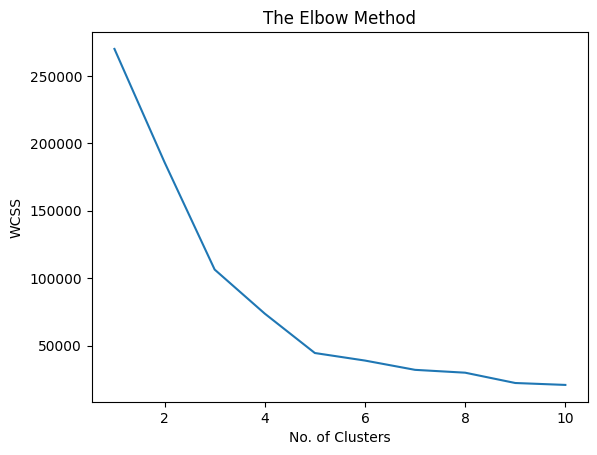

In [8]:
# The elbow method is a technique used to determine the optimal number of clusters in K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters, and selecting the number of clusters where the rate of decrease in WCSS sharply levels off, forming an "elbow" shape in the graph.

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Building the model
kmeansmodel = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeansmodel.fit_predict(customers)

1. `plt.scatter()`: This is a function from matplotlib.pyplot that creates a scatter plot.

2. `customers[y_kmeans == 0, 0]` and `customers[y_kmeans == 0, 1]`:
   - `customers` is likely a 2D array or DataFrame containing your data points.
   - `y_kmeans == 0` creates a boolean mask selecting all points assigned to cluster 0.
   - The `, 0` and `, 1` at the end select the first and second columns of the filtered data, respectively. These represent the x and y coordinates for the scatter plot.

3. `s = 50`: This sets the size of the markers in the scatter plot.

4. `c = 'red'`: This sets the color of the markers to red.

5. `label = cluster1`: This assigns a label to this set of points, which will appear in the plot legend.

In essence, this line is plotting all the data points that belong to cluster 0 (as determined by K-means) in red on a 2D scatter plot. The x-coordinates come from the first column of your data, and the y-coordinates from the second column, but only for those points assigned to cluster 0.

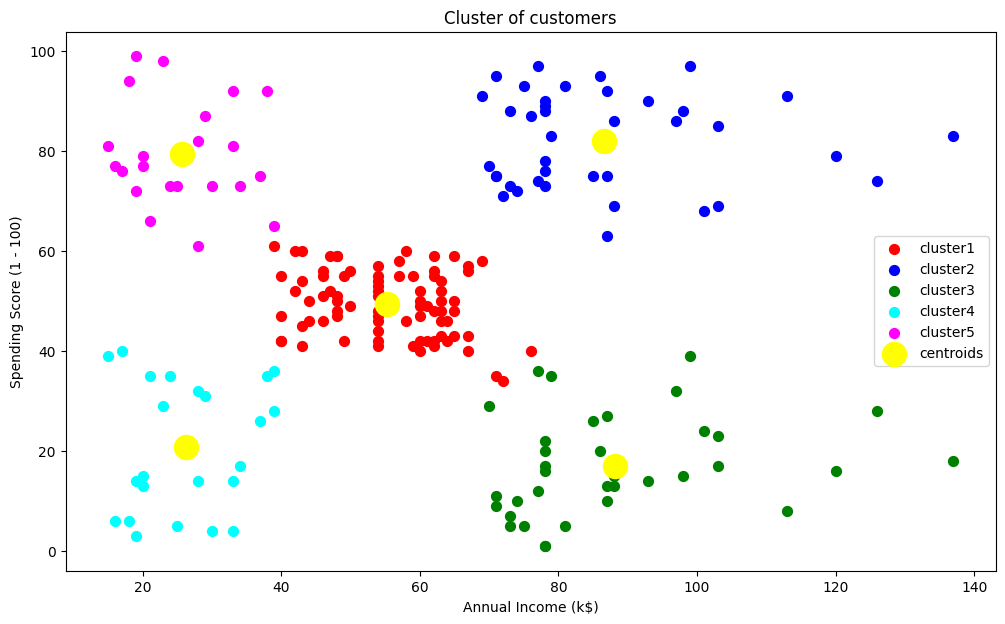

In [10]:
plt.figure(figsize=(12, 7))

plt.scatter(customers[y_kmeans == 0, 0], customers[y_kmeans == 0, 1], s = 50, c = 'red', label = 'cluster1')
plt.scatter(customers[y_kmeans == 1, 0], customers[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'cluster2')
plt.scatter(customers[y_kmeans == 2, 0], customers[y_kmeans == 2, 1], s = 50, c = 'green', label = 'cluster3')
plt.scatter(customers[y_kmeans == 3, 0], customers[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'cluster4')
plt.scatter(customers[y_kmeans == 4, 0], customers[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'cluster5')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')

plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

<font color='blue'><b><h1>Unveiling Consumer Archetypes: A Chromatic Tapestry of Financial Behaviors</h1></b></font>

Our K-means clustering analysis has revealed a fascinating quintet of consumer archetypes, each represented by a distinct hue in our visualization:

1. **The Balanced Moderates (Crimson Sphere):**
   Embodied by the warm glow of red, these individuals strike an equilibrium between their income and expenditures. They navigate the financial landscape with measured steps, neither overly frugal nor excessively indulgent.

2. **The Aspirational Spenders (Sapphire Constellation):**
   Illuminated in a deep blue, this cluster represents those who, despite modest earnings, exhibit a penchant for higher spending. Their financial conduct suggests a lifestyle that may outpace their current means, possibly driven by aspirational motives.

3. **The Affluent Connoisseurs (Emerald Elite):**
   Glistening in green, this cohort represents our primary target demographic. These individuals possess both substantial earning power and a willingness to engage in high-level spending, potentially indicative of a taste for luxury or quality investments.

4. **The Prudent Minimalists (Cyan Conservators):**
   Depicted in cool cyan, this group exemplifies financial caution. Their low earning and spending patterns suggest either a deliberate choice of frugality or circumstances necessitating careful resource management.

5. **The Astute Accumulators (Magenta Maestros):**
   Rendered in vibrant magenta, these consumers demonstrate financial acumen by maintaining high earnings while exercising spending restraint. This behavior pattern may indicate a strong propensity for saving or investing.

# Customer Segmentation Analysis: Actionable Insights

## Key Findings
Our K-means clustering analysis has successfully identified distinct customer segments, with Cluster 3 emerging as our primary target group for new product marketing initiatives.

## Recommended Strategy
1. **High-Priority Segment (Cluster 3)**:
   - Implement a daily email alert system
   - Focus: New brand product promotions
   - Rationale: High propensity for new product adoption

2. **Other Segments (Clusters 1, 2, 4, 5)**:
   - Establish a less frequent communication cadence:
     * Option A: Weekly updates
     * Option B: Monthly newsletters
   - Focus: Tailored content based on segment characteristics

## Implementation Plan
1. Develop a customized email marketing system to manage varying frequencies
2. Create targeted content strategies for each customer segment
3. Monitor engagement metrics to optimize communication frequency and content

## Expected Outcome
By adopting this segmented approach, we anticipate:
- Increased engagement from high-value customers (Cluster 3)
- Improved overall customer satisfaction through personalized communication
- Enhanced efficiency in marketing resource allocation
- Potential boost in new product adoption rates